<a href="https://colab.research.google.com/github/sanjanamungara/lung-cancer-detection/blob/main/Lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import header files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Read the data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/survey lung cancer.csv')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Information about the dataset or Exploratory data Analysis

In [ ]:
data.shape

(309, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    int64
 15  GENDER_M               309 non-null    i

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


0 indicates --No lung cancer
1 indicates--lung cancer

In [ ]:
data["GENDER"].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [ ]:
data["AGE"].value_counts()

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64

In [ ]:
# See the min, max, mean values
print('The highest Smoking was of:',data['SMOKING'].max())
print('The lowest Smoking was of:',data['SMOKING'].min())
print('The average Smoking in the data:',data['SMOKING'].mean())

The highest Smoking was of: 2
The lowest Smoking was of: 1
The average Smoking in the data: 1.5631067961165048


Data Visualization in the form graphs

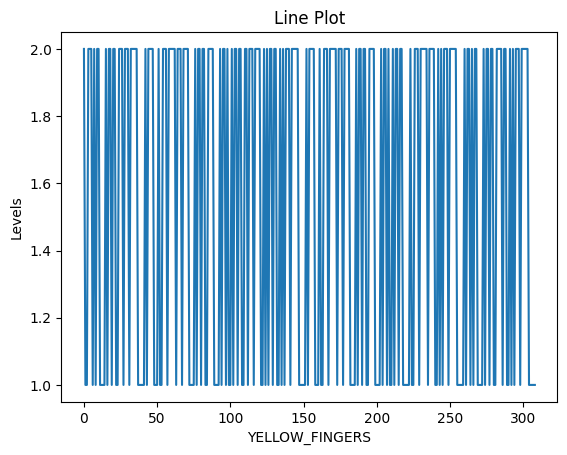

In [ ]:
import matplotlib.pyplot as plt
# Line plot
plt.plot(data['YELLOW_FINGERS'])
plt.xlabel("YELLOW_FINGERS")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

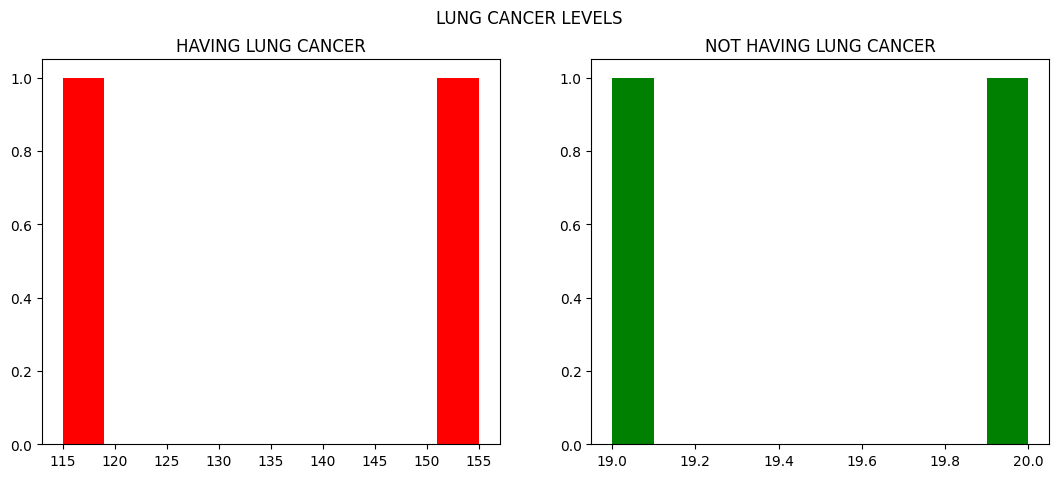

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['LUNG_CANCER']=='YES']['SMOKING'].value_counts()

ax1.hist(data_len,color='Red')
ax1.set_title('HAVING LUNG CANCER')

data_len=data[data['LUNG_CANCER']=='NO']['SMOKING'].value_counts()
ax2.hist(data_len,color='Green')
ax2.set_title('NOT HAVING LUNG CANCER')

fig.suptitle('LUNG CANCER LEVELS')
plt.show()

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool

In [ ]:
newdata=data.drop_duplicates()

In [ ]:
newdata

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


Pre-Processing

In [ ]:
data.isnull().sum() #checking for total null values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Normalization

In [ ]:
data[1:5]


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
from sklearn import preprocessing
import pandas as pd
d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["SMOKING", "ANXIETY", "YELLOW_FINGERS", "CHRONIC DISEASE"])
scaled_df.head()

,SMOKING,ANXIETY,YELLOW_FINGERS,CHRONIC DISEASE
0,0.062102,0.034690,0.069130,0.072028
1,0.066602,0.069379,0.034565,0.036014
2,0.053102,0.034690,0.034565,0.036014
3,0.056702,0.069379,0.069130,0.072028
4,0.056702,0.034690,0.069130,0.036014


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Extract the 'LUNG_CANCER_RESULT' column
lung_cancer_column = data['LUNG_CANCER']
# Initialize LabelEncoder
label_encoder=LabelEncoder()
# Fit and transform the labels to integers
encoded_labels = label_encoder.fit_transform(lung_cancer_column)
# Replace the original column with the encoded values
data['LUNG_CANCER'] = encoded_labels
# Display the DataFrame with the updated column
print(data.head())



  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                     

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['GENDER']
encoder = OneHotEncoder(sparse=False, drop='first')# 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols=pd.DataFrame(encoder.fit_transform(data[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))
encoded_cols = encoded_cols.astype(int)
data=pd.concat([data,encoded_cols],axis=1)
data.drop(categorical_cols,axis=1,inplace=True)
data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


In [ ]:
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


split into train and test in the ration 70:30

In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['CHEST PAIN'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['CHEST PAIN']
len(train_X), len(train_Y), len(test_X), len(test_Y)
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.6774193548387096
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63        47
           1       0.64      0.80      0.71        46

    accuracy                           0.68        93
   macro avg       0.69      0.68      0.67        93
weighted avg       0.69      0.68      0.67        93



In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)
#Evaluate the model using various metrices
mse=mean_squared_error(test_Y,prediction)
rmse=mean_squared_error(test_Y,prediction,squared=False)
mae=mean_absolute_error(test_Y,prediction)
r_squared=r2_score(test_Y,prediction)

print('Mean squared Error:',mse)
print('Root mean Squared error:',rmse)
print('Mean Absolute Error:', mae)
print('R-squared:',r_squared)

The accuracy of Linear Regression is: 0.6559139784946236
Mean squared Error: 0.22982094967541392
Root mean Squared error: 0.4793964431192767
Mean Absolute Error: 0.38849568102173276
R-squared: 0.08060990113660726
